In [88]:
import pandas as pd 
import numpy as np 


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('data/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
df.shape

(891, 12)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [94]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Initial Assessment

- Missing values in Age, cabin (around 70% missing vals, therefore "DROP"), embarked
- Few cols have inappropriate data type

In [95]:
df.drop(columns=['Cabin'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [96]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


/var/folders/sv/g8vyvw8s2136bxp6jkg5vx3w0000gn/T/ipykernel_30568/1226013979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [98]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [99]:
# Most likely is 'S', there fillna == 'S'
df['Embarked'].fillna('S', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


/var/folders/sv/g8vyvw8s2136bxp6jkg5vx3w0000gn/T/ipykernel_30568/4218956565.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [100]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Age'] = df['Age'].astype(int)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [102]:
df.drop(columns=['Embarks'], inplace=True)
df.info()

KeyError: "['Embarks'] not found in axis"

In [23]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


### Univariate Analysis

Survived
0    549
1    342
Name: count, dtype: int64

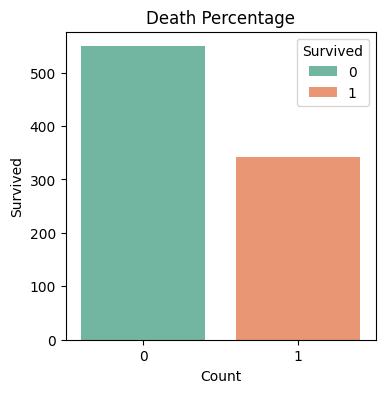

The Death Percentage was -> 62%


In [ ]:
#  Survived column

plt.figure(figsize=(4,4))
sns.countplot(x='Survived', data=df, hue='Survived', palette='Set2')
plt.title('Death Percentage')
plt.xlabel('Count')
plt.ylabel('Survived')
plt.show()

death_percent = round((df['Survived'].value_counts().values[0]/891)*100)

print(f"The Death Percentage was -> {death_percent}%")

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


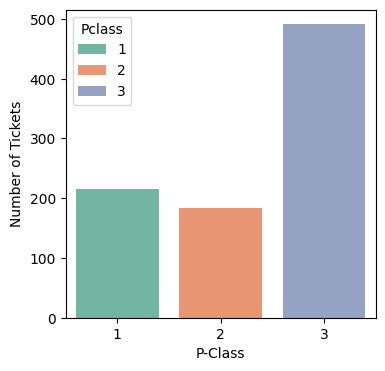

In [49]:
# P Class

print((df['Pclass'].value_counts()/891)*100)
plt.figure(figsize=(4,4))
sns.countplot(x='Pclass',data=df, hue='Pclass', palette='Set2')
plt.xlabel('P-Class')
plt.ylabel('Number of Tickets')
plt.show()

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


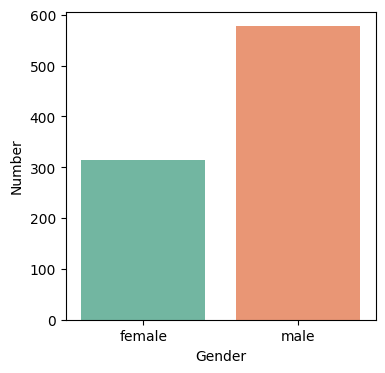

In [55]:
print((df['Sex'].value_counts()/891)*100)

plt.figure(figsize=(4,4))
sns.countplot(x='Sex',data=df, hue='Sex', palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Number')
plt.show()

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


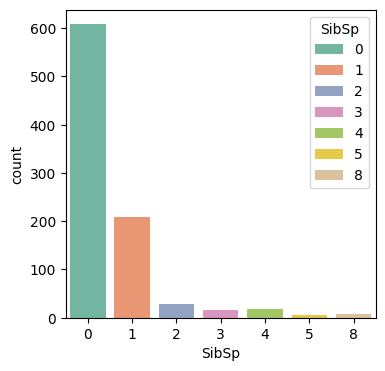

In [61]:
print((df['SibSp'].value_counts()/891)*100)

plt.figure(figsize=(4,4))
sns.countplot(x='SibSp',data=df, hue='SibSp', palette='Set2')

plt.show()

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


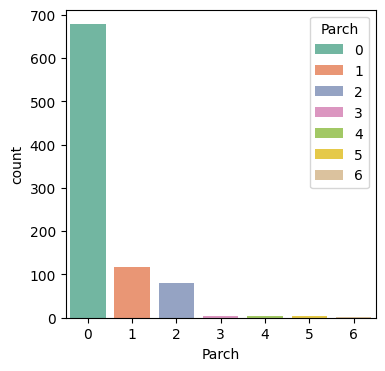

In [62]:
print((df['Parch'].value_counts()/891)*100)

plt.figure(figsize=(4,4))
sns.countplot(x='Parch',data=df, hue='Parch', palette='Set2')

plt.show()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


[]

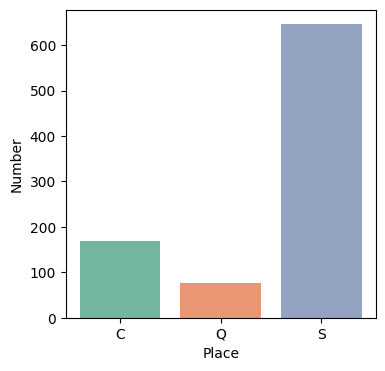

In [67]:
print(df['Embarked'].value_counts())
print((df['Embarked'].value_counts()/891)*100)

plt.figure(figsize=(4,4))
sns.countplot(x='Embarked', data=df, hue='Embarked', palette='Set2')
plt.xlabel('Place')
plt.ylabel('Number')
plt.plot()

0.45956263424701577
0.9865867453652877


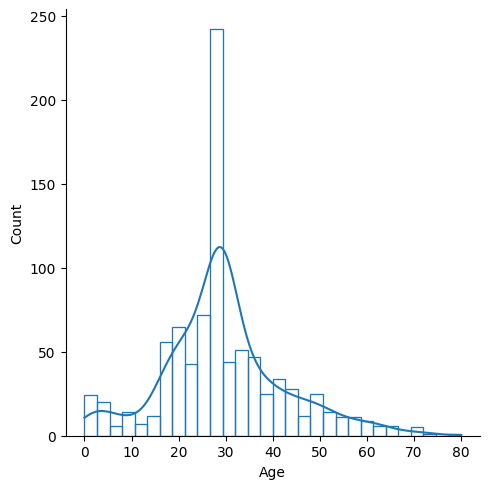

In [74]:
sns.displot(df['Age'], kde=True, fill=False)
print(df['Age'].skew())
print(df['Age'].kurt())

<Axes: ylabel='Age'>

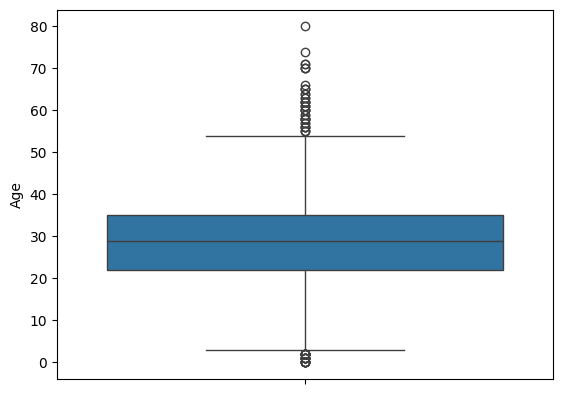

In [75]:
sns.boxplot(df['Age'])

In [ ]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


### Numerical Columns
- PassengerId	
- Age
- SibSp
- Parch
- Fare

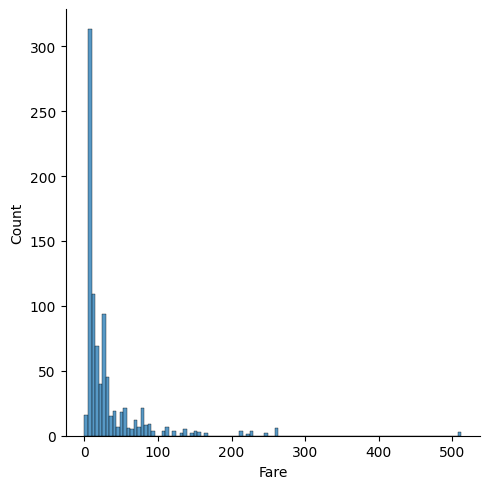

In [78]:
sns.displot(df['Fare'])

In [81]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


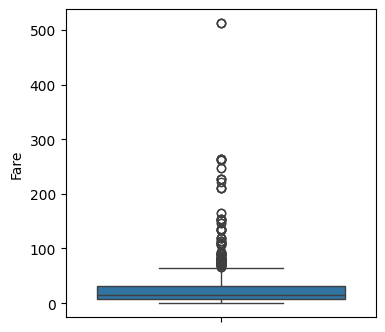

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(df['Fare'])
plt.show()

# Multivariate Analysis

### Survival with pClass

Survived,0,1
Pclass,,
1,37.0,63.0
2,53.0,47.0
3,76.0,24.0


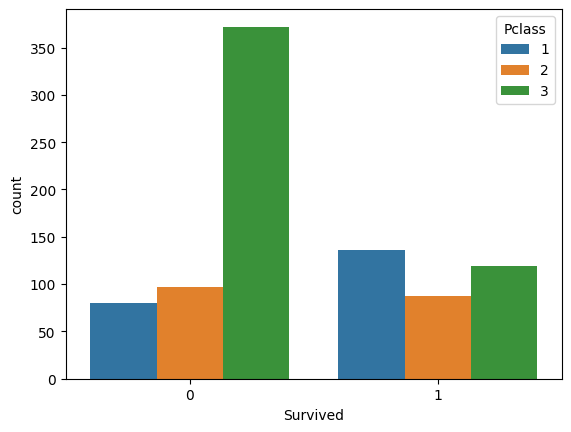

In [106]:
sns.countplot(x=df['Survived'], data=df, hue=df['Pclass'])

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100),axis=1)

Survived,0,1
Sex,,
female,26.0,74.0
male,81.0,19.0


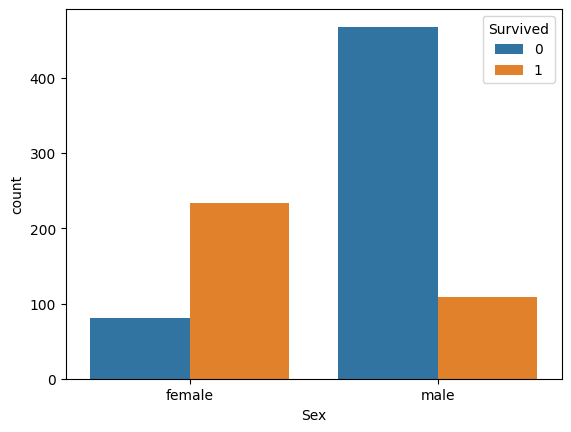

In [110]:
# servived with sex

sns.countplot(x=df['Sex'],data=df, hue=df['Survived'])
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100), axis=1)

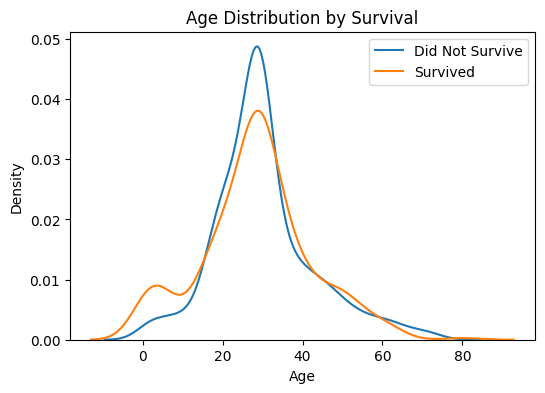

In [124]:
#  Survived with Age

plt.figure(figsize=(6,4))
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', label='Did Not Survive')
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', label='Survived')
plt.legend()
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


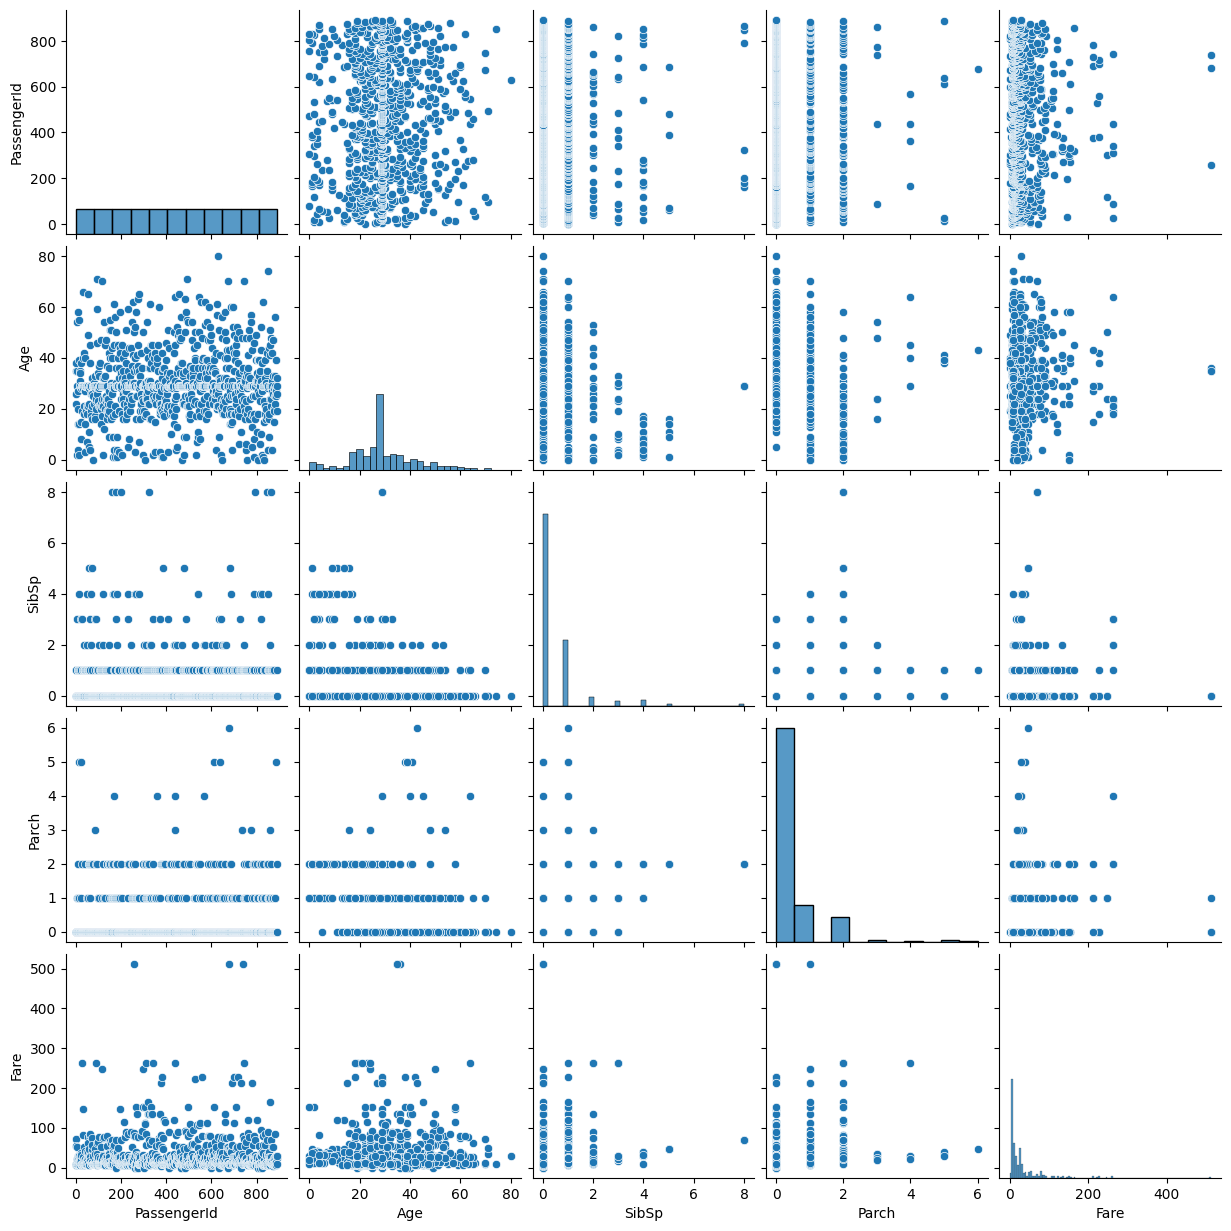

In [125]:
sns.pairplot(df)

In [144]:
df.head()
new_df = df.copy()
new_df['Sex'] = new_df['Sex'].map({'male':0, 'female':1})
new_df['Embarked'] = new_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

new_df.drop(columns=['Ticket','Name', 'PassengerId'], axis=1, inplace=True)

new_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0


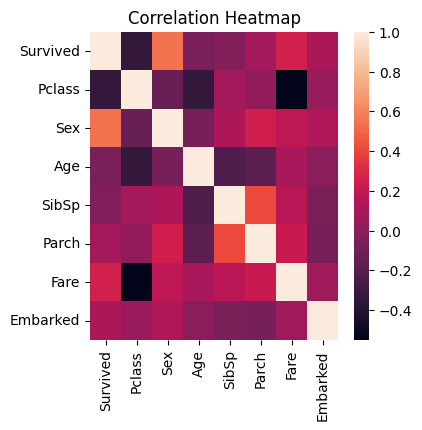

In [145]:
plt.figure(figsize=(4,4))
sns.heatmap(new_df.corr())
plt.title("Correlation Heatmap")
plt.show()

In [146]:
# Feature Engineering

new_df['Family Size'] = new_df['SibSp']+new_df['Parch']


In [147]:
def family_type(number):
    if number==0:
        return 'Alone'
    elif 1 <= number < 5:
        return 'Medium'
    else:
        return 'Large'
    

In [148]:
new_df['Family Size'] = new_df['Family Size'].apply(family_type)

In [150]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size
0,0,3,0,22,1,0,7.2500,0,Medium
1,1,1,1,38,1,0,71.2833,1,Medium
2,1,3,1,26,0,0,7.9250,0,Alone
3,1,1,1,35,1,0,53.1000,0,Medium
4,0,3,0,35,0,0,8.0500,0,Alone


In [151]:
new_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size
670,1,2,1,40,1,1,39.0000,0,Medium
455,1,3,0,29,0,0,7.8958,1,Alone
333,0,3,0,16,2,0,18.0000,0,Medium
642,0,3,1,2,3,2,27.9000,0,Large
420,0,3,0,29,0,0,7.8958,1,Alone


In [152]:
new_df.drop(columns=['SibSp','Parch'], inplace=True)

In [153]:
new_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,0,3,0,22,7.2500,0,Medium
1,1,1,1,38,71.2833,1,Medium
2,1,3,1,26,7.9250,0,Alone
3,1,1,1,35,53.1000,0,Medium
4,0,3,0,35,8.0500,0,Alone


In [154]:
pd.crosstab(new_df['Family Size'], new_df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
Family Size,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0
